# Project: Investigating no-show medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
    

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This report aims to analyze a dataset ("*No-show appointments*") which is composed of information collected from 100k medical appointments in Brazil and tries to understand if patients are likely or not to show up for their appointment.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The dataset is composed of some characteristics about the patient, such as gender, age, presence of a medical condition (hypertension, diabetes, alcoholism, and handicap). Also, it indicates if the patient has the support of the welfare program Bolsa Família, in which neighborhood the hospital is located if the patient received an SMS, and the scheduled and appointment dates. An important remark while considering the dataset is that the no-show column presents ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this report, it will be explored what can lead to the patient not showing up to the appointment. The questions to be answered are:
   * Do the patients usually show up to their appointments?
   * Is there any relationship between gender and no-show rates?
   * Is there any relation between age and no-show rates?
   * Is there any relation between the medical condition and no-show rates?
   * Is there any medical condition that is more likely to set an appointment?
   * Is there any relation between hospital location and no-show rates?
   * Is there any relation between the support of the welfare program and the no-show rate?
   * Has receiving an SMS increased influenced the no-show rate?
   * Does the waiting period influence the no-show rate?
   


In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Import data
df = pd.read_csv('C:\\Users\\YASH\\Desktop\\udacity\\noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Inspecting data

In [3]:
print('There are {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

There are 110527 rows and 14 columns.


In [4]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* There are no features with missing values.
* The patient ID should be an integer number.
* Schedule and appointment should be dates, need to fix data type.

In [5]:
print(df.ScheduledDay[0])
print(type(df.ScheduledDay[0]))

2016-04-29T18:38:08Z
<class 'str'>


* The dates are placed as strings.

In [6]:
# Number of unique values in each column: 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

* There is a smaller number of patient IDs than appointment IDs, indicating that patients might set more than one appointment.
* Appointment day has more entry values than scheduled days.

In [7]:
# Verify entry types and values
print('Gender is a {} type and has as values {}'.format(type(df.Gender[0]), df.Gender.unique()))
print()
print('Scholarship is a {} type and has as values {}'.format(type(df.Scholarship[0]), df.Scholarship.unique()))
print()
print('Hipertension is a {} type and has as values {}'.format(type(df.Hipertension[0]), df.Hipertension.unique()))
print()
print('Diabetes is a {} type and has as values {}'.format(type(df.Diabetes[0]), df.Diabetes.unique()))
print()
print('Alcoholism is a {} type and has as values {}'.format(type(df.Alcoholism[0]), df.Alcoholism.unique()))
print()
print('Handcap is a {} type and has as values {}'.format(type(df.Handcap[0]), df.Handcap.unique()))
print()
print('SMS_received is a {} type and has as values {}'.format(type(df.SMS_received[0]), df.SMS_received.unique()))
print()

Gender is a <class 'str'> type and has as values ['F' 'M']

Scholarship is a <class 'numpy.int64'> type and has as values [0 1]

Hipertension is a <class 'numpy.int64'> type and has as values [1 0]

Diabetes is a <class 'numpy.int64'> type and has as values [0 1]

Alcoholism is a <class 'numpy.int64'> type and has as values [0 1]

Handcap is a <class 'numpy.int64'> type and has as values [0 1 2 3 4]

SMS_received is a <class 'numpy.int64'> type and has as values [0 1]



* Gender is a string indicating M or F.
* Other data types are integer with 0 or 1.
* There is the presence of 5 different values for handicap, which could be a typo.

In [8]:
# Analyse the difference between appointment and scheduled days number of entries.
print('The days in which appointments were scheduled range in {}'.format(np.sort(pd.to_datetime(df['ScheduledDay']).dt.strftime('%Y-%m-%d').unique())))

print('The days in which appointments took place range in {}'.format(np.sort(pd.to_datetime(df['AppointmentDay']).dt.strftime('%Y-%m-%d').unique())))


The days in which appointments were scheduled range in ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-0

* The scheduled dates are taken over a longer period than appointment dates.
* Appointments 06/May/16 to 08/June/2016, a month period.
* The scheduled day should occur before the appointment day, need to verify these dates.

In [9]:
# Observe statistics for each column of data:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* The average age of 37 years, the minimum is -1, maximum age of 115 (possible mistake).
* The mean indicates that most people do not have any medical condition and do not support of welfare program.

In [10]:
# Verify possible mistake in age entry
np.sort(df.Age.unique()) # Display ordered unique age values in the dataset

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

* -1 is not a possible age, probably is a typo.
* 115 could also be a typo.
* These two values could be disconsidered from the dataset.
* Age zero could indicate small babies.

In [11]:
# Verify if age 0 is for babies, considering they should not have hypertension and alcoholism
df[(df.Age == 0) & ((df.Hipertension == 1) | (df.Alcoholism == 1))]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


* Return no values, indicating that indeed age zero is placed for small babies.


### Data Cleaning
* It could be noticed some typos in the names of the columns, which will be corrected.
* All the columns' names will be placed as lowercase in order to avoid typos.
* The appointment ID column gives no extra information, therefore it will be deleted.
* The type of scheduled and appointment day will be fixed to date type & patient ID will be fixed to an integer.
* Ages below 0 and above 102 will be deleted from the dataset.

In [12]:
# Modify columns names
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True) # put all columns in lower case
print(df.columns)

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')


In [13]:
# Renaming columns & fixing typos
df.rename(columns={'patientid':'patient_id','appointmentid':'appointment_id', 'scheduledday':'scheduled_day', 'appointmentday':'appointment_day','hipertension': 'hypertension', 'handcap': 'handicap'}, inplace=True)
print(df.columns)

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')


In [14]:
# Drop appointment ID column
df.drop(['appointment_id'], axis = 1, inplace = True)

In [15]:
# Fixing data types
df['patient_id'] = df['patient_id'].astype(int) # Change values from float to integer
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date
print(type(df.patient_id.iloc[0]))
print(df.scheduled_day.iloc[0])
print(df.appointment_day.iloc[0])

<class 'numpy.int32'>
2016-04-29
2016-04-29


In [16]:
# Removing ages below 0 and above 102
df = df[df.age >= 0]
df = df[df.age < 115]
np.sort(df.age.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102], dtype=int64)

In [17]:
# Verify if scheduled day occurs before appoitment day
df['days_before_appoitment'] = df['appointment_day']-df['scheduled_day']
df[df.days_before_appoitment.dt.days<0]

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_before_appoitment
27033,-2147483648,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1 days
55226,-2147483648,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1 days
64175,-2147483648,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1 days
71533,-2147483648,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6 days
72362,-2147483648,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1 days


* There are five apointments with appoitments before schedule, this could be a typo and will be deleted from the dataset.

In [18]:
# Deleting negative rows with negative days before apointment
df = df[df.days_before_appoitment.dt.days >= 0]
# Check if the modification is ok
df[df.days_before_appoitment.dt.days<0]

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_before_appoitment


In [19]:
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,days_before_appoitment
0,-2147483648,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,-2147483648,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,-2147483648,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,-2147483648,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,-2147483648,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


<a id='eda'></a>
## Exploratory Data Analysis


### Do the patients usually show up to their appointments?

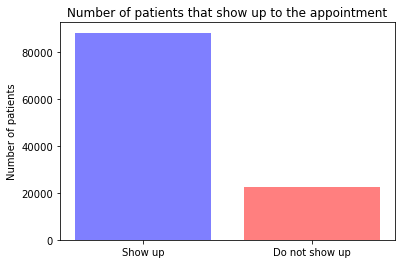

In [20]:
objects = ('Show up', 'Do not show up')
y_pos = np.arange(len(objects))
count = df.no_show.value_counts() # Count the values of 'Yes' and 'No' in the no_show column
plt.bar(y_pos, count, align='center', alpha=0.5,color = ['b','r'])
plt.xticks(y_pos, objects)
plt.ylabel('Number of patients')
plt.title('Number of patients that show up to the appointment')
plt.show();

* It is possible to observe that the majority of patients do show up to the appointments.

### Is there any relation between gender and no-show rates?

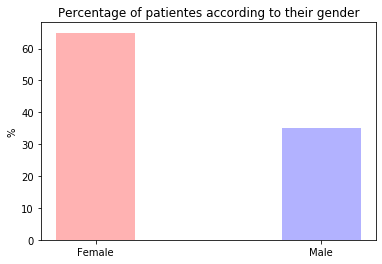

In [21]:
female = df.query('gender == "F"').no_show.value_counts() # Count the values of 'Yes' and 'No' in the no_show column for all females
male = df.query('gender == "M"').no_show.value_counts() # Count the values of 'Yes' and 'No' in the no_show column for all males

female_p = female.sum()/(male.sum()+female.sum()) *100
male_p =  male.sum()/(male.sum()+female.sum()) *100

labels = ['Female', 'Male']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x , [female_p, male_p], width, alpha=0.3,color=['r','b'])
ax.set_ylabel('%')
ax.set_title('Percentage of patientes according to their gender')
ax.set_xticks(x)
ax.set_xticklabels(labels);

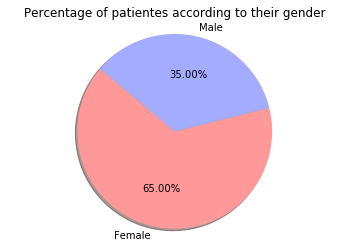

In [22]:
# Data to plot
labels = 'Female', 'Male'
sizes = [female.sum(), male.sum()]
colors = ['#ff9999', '#a3acff']
# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of patientes according to their gender')
plt.show();

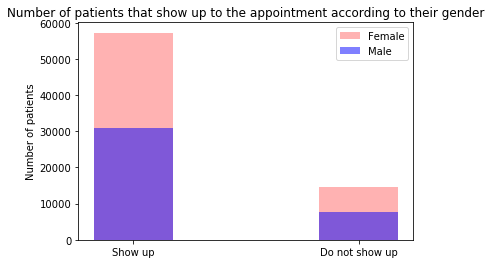

In [23]:
labels = ['Show up', 'Do not show up']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x , female, width, alpha=0.3,label='Female',color='r')
rects2 = ax.bar(x , male, width, alpha=0.5,label='Male', color='b')
ax.set_ylabel('Number of patients')
ax.set_title('Number of patients that show up to the appointment according to their gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

* It is possible to observe that females have a higher number of total appointments.
* This fact leads to higher values for both yes and no show-up rates.
* Here, the only conclusion is that, overall, more females set appointments.

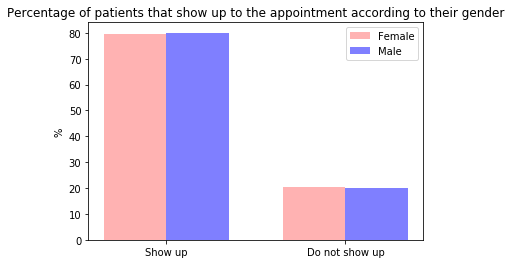

In [24]:
# Try to understand if ercentage females have a different show up rate than males
fem_p = round(((female/female.sum())*100),2)
male_p = round(((male/male.sum())*100),2)

labels = ['Show up', 'Do not show up']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fem_p, width, alpha=0.3,label='Female',color='r')
rects2 = ax.bar(x + width/2, male_p, width, alpha=0.5,label='Male', color='b')
ax.set_ylabel('%')
ax.set_title('Percentage of patients that show up to the appointment according to their gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

* Considering the percentage, we can observe that both genders have a similar show-up rate.

In [25]:
f_age_dist = df.query('gender == "F"').age.value_counts()
m_age_dist = df.query('gender == "M"').age.value_counts()
np.setdiff1d(f_age_dist.index, m_age_dist.index) 

array([ 99, 102], dtype=int64)

In [26]:
# Observed an issue while plotting, the males data had a smaller record.
# This occurs because there is no males with 99 and 102 years.
# Here we include these ages in the males data set.
m_age_dist.at[99] = 0
m_age_dist.at[102] = 0
f_age_dist = f_age_dist.sort_index()
m_age_dist = m_age_dist.sort_index()

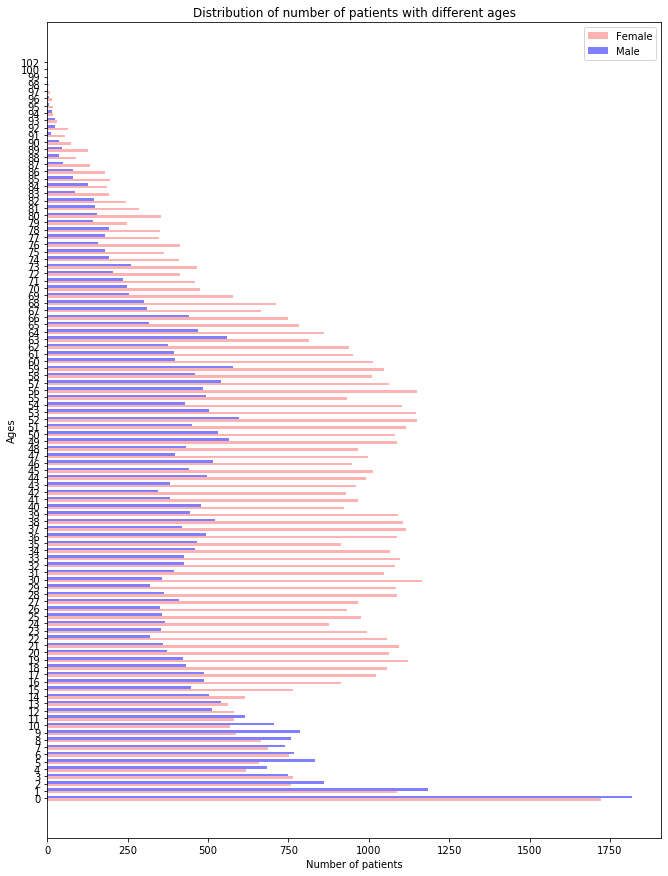

In [27]:
fig, ax = plt.subplots(figsize=(11,15))

ages = np.sort(df.age.unique())
y_pos = np.arange(len(ages))
width = 0.35

h1 = ax.barh(y_pos- width/2, f_age_dist, width, label='Female', color = 'r', alpha = 0.3)
h2 = ax.barh(y_pos+ width/2, m_age_dist, width, label='Male', color = 'b', alpha = 0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(ages)

ax.set_ylabel('Ages')
ax.set_xlabel('Number of patients')
ax.set_title('Distribution of number of patients with different ages')
ax.legend()

plt.show();

* It is possible to notice that there is a higher number of appointments set by women with age ranging between 16 and 62 years.
* It is possible to see that appointments are predominantly made by women, apart from babies (age zero and one).

### Is there any relation between age and no-show rates?

In [28]:
# Identify patients that by no_show and age
n_age_dist = df.query('no_show == "No"')
y_age_dist = df.query('no_show == "Yes"')

n_age_dist = n_age_dist.groupby(['age']).no_show.value_counts()
y_age_dist = y_age_dist.groupby(['age']).no_show.value_counts()

np.setdiff1d(n_age_dist.index.get_level_values(0), y_age_dist.index.get_level_values(0)) 

array([ 99, 100, 102], dtype=int64)

In [29]:
# There are no "yes" for 99,100 and 102 years
# In order to include those values:
y_age_dist.at[99] = 0
y_age_dist.at[100] = 0
y_age_dist.at[102] = 0
# Sorting according to the age index
n_age_dist = n_age_dist.sort_index()
y_age_dist = y_age_dist.sort_index()

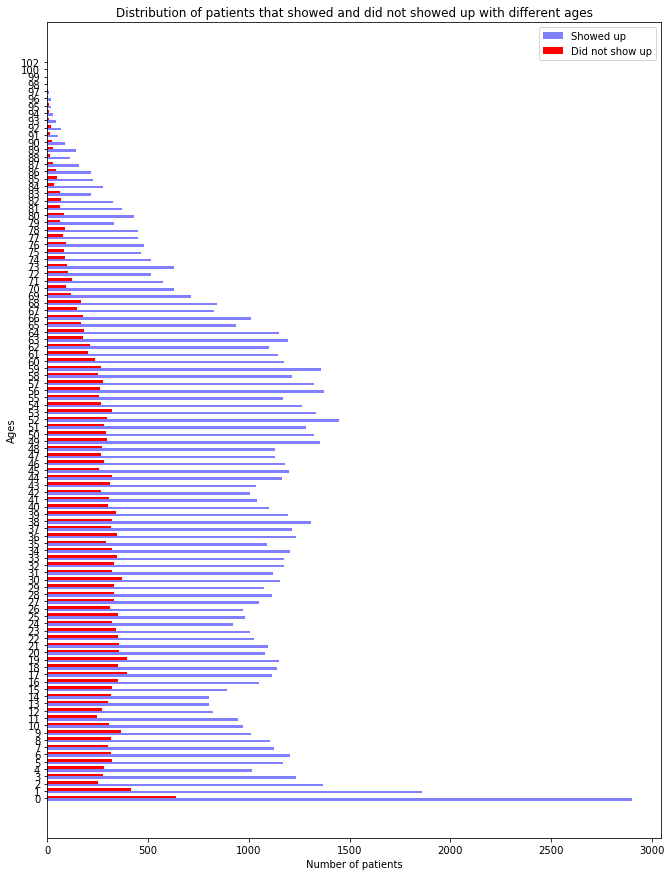

In [30]:
# Ploting the number of patients that showed up for each age
fig, ax = plt.subplots(figsize=(11,15))

ages = np.sort(df.age.unique())
y_pos = np.arange(len(ages))
width = 0.35

h1 = ax.barh(y_pos - width/2, n_age_dist, width, label = 'Showed up', color = 'b', alpha = 0.5)
h2 = ax.barh(y_pos + width/2, y_age_dist, width, label = 'Did not show up', color = 'r')
ax.set_yticks(y_pos)
ax.set_yticklabels(ages)

ax.set_ylabel('Ages')
ax.set_xlabel('Number of patients')
ax.set_title('Distribution of patients that showed and did not showed up with different ages')
ax.legend()

plt.show();

* It is possible to notice that there are many appointments set for babies and show-up rates are high. Newborn babies usually go more often to the pediatrician.
* The appointments are set more or less evenly for age ranges between 16 and 64.
* The no-show rate is almost constant for the same age range.

In [31]:
# In order to identify age groups, a new column will be created
bin_names = [ 'children', 'teenager', 'young_adult', 'adult','elderly'] # Age groups
bin_edges = [-1, 12, 19, 35, 60, 102] # Age edges: children up to 12 years, teens between 12 and 19, young adult between 19 and 35, adult between 35 and 60, elderly above 60  
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_names)
# Identify individuals that show and did not show up to their appoint according to age group
s = df.query('no_show == "Yes"').age_groups.value_counts().sort_index()
n = df.query('no_show == "No"').age_groups.value_counts().sort_index()

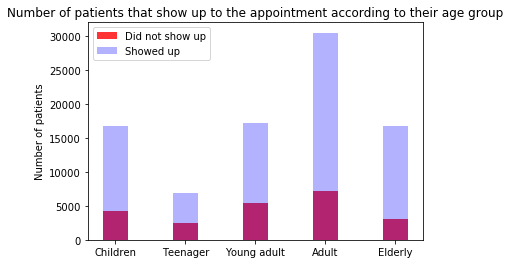

In [32]:
# Plotting the number of patients that showed and did not show to the appointment in each age group
labels = ['Children', 'Teenager','Young adult','Adult','Elderly']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , s, width, alpha=0.8, label='Did not show up',color ='r')
rects2 = ax.bar(x , n, width, alpha=0.3, label='Showed up',color = 'b')
ax.set_ylabel('Number of patients')
ax.set_title('Number of patients that show up to the appointment according to their age group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

* It is possible to conclude that more adults set appointments and due to its' higher number they also have higher no-show numbers.
* Young adults have similar numbers of show-up as elderly, however, they have a higher percentage of no-show up. This could be due to more activities in the daily life of young adults when compared to the elderly or it could be that the young adult could solve the health problem during the waiting period.

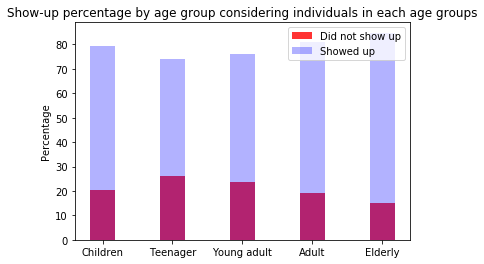

In [33]:
# Calculate the Percentage of individual in each age group that show or do not show to appointments
percent_y = s/(s+n)*100
percent_n = n/(s+n)*100

labels = ['Children', 'Teenager','Young adult','Adult','Elderly']
x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x , percent_y, width, alpha=0.8, label='Did not show up',color ='r')
rects2 = ax.bar(x , percent_n, width, alpha=0.3, label='Showed up',color = 'b')
ax.set_ylabel('Percentage')
ax.set_title('Show-up percentage by age group considering individuals in each age groups')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

* It is possible to notice that the elderly have the highest show-up rate.
* Comparing to the first plot, we can not see that babies have a high number of appointments and no-show rates for younger ages.

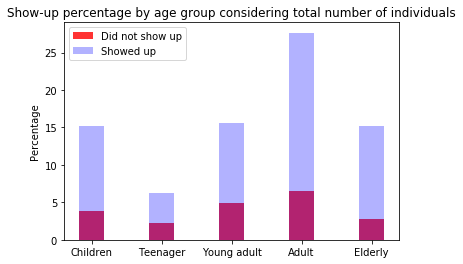

In [34]:
percent_y_t = s/(s.sum()+n.sum())*100
percent_n_t = n/(s.sum().sum()+n.sum())*100

labels = ['Children', 'Teenager','Young adult','Adult','Elderly']
x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x , percent_y_t, width, alpha=0.8, label='Did not show up',color ='r')
rects2 = ax.bar(x , percent_n_t, width, alpha=0.3, label='Showed up',color = 'b')
ax.set_ylabel('Percentage')
ax.set_title('Show-up percentage by age group considering total number of individuals')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

* As mentioned before, considering all appointments set, the adults have the highest show-up rate.
* Here, it is possible to see children have a high percentage of appointments. However, it is still missed the high number for ages below one.

### Is there any relation between medical condition and no-show rates?
### Is there any medical condition that is more likely to set an appointment?

In [35]:
# Definig group of individual with medical condition and their show-up rate
alcoholism = df.query('alcoholism=="1"').no_show.value_counts()
hypertension = df.query('hypertension=="1"').no_show.value_counts()
diabetes = df.query('diabetes=="1"').no_show.value_counts()
handicap = df.query('handicap=="1"').no_show.value_counts()

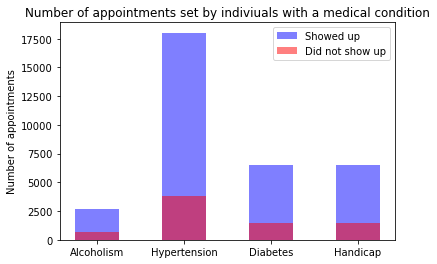

In [36]:
# Plotting appointments set for each medical condition according to show-up rate
labels = ['Alcoholism','Hypertension','Diabetes', 'Handicap']
width = 0.15
x = np.arange(-4*width,3*width,2*width)

fig, ax = plt.subplots()
rects1 = ax.bar([x[0],x[0]], alcoholism, width, label='Alcoholism', alpha = 0.5, color = ['b','r'])
rects2 = ax.bar([x[1],x[1]], hypertension, width, label='Hypertension', alpha = 0.5, color = ['b','r'])
rects3 = ax.bar([x[2],x[2]], diabetes, width, label='Diabetes', alpha = 0.5, color = ['b','r'])
rects4 = ax.bar([x[3],x[3]], diabetes, width, label='Handicap', alpha = 0.5, color = ['b','r'])

ax.set_ylabel('Number of appointments')
ax.set_title('Number of appointments set by indiviuals with a medical condition')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(rects1, ['Showed up','Did not show up'],loc=1);

* It is possible to observe that individuals with hypertension have a higher number of appointments.
* People with handicap and diabetes have a similar number of appointments.
* However, it is not possible to conclude if a specific condition among alcoholism, hypertension, diabetes and handicap lead to a higher level of no-show.

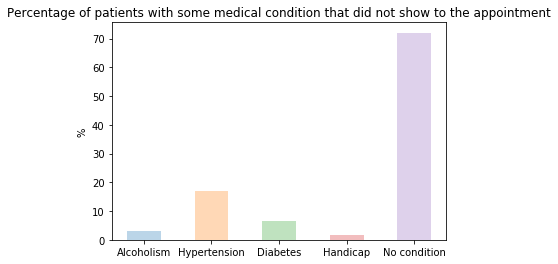

In [37]:
# How is the percentage of no show for those with medical condition?
total_no = df.query('no_show == "Yes"').no_show.value_counts()
alcoholism_p = alcoholism/total_no*100
hypertension_p = hypertension/total_no*100
diabetes_p = diabetes/total_no*100
handicap_p = handicap/total_no*100
no_medical = 100 - alcoholism_p - hypertension_p -diabetes_p - handicap_p


labels = ['Alcoholism','Hypertension','Diabetes', 'Handicap', 'No condition']
width = 0.15
x = np.arange(-4*width,5*width,2*width)

fig, ax = plt.subplots()
rects1 = ax.bar(x[0], alcoholism_p, width, alpha = 0.3)
rects2 = ax.bar(x[1], hypertension_p, width, alpha = 0.3)
rects3 = ax.bar(x[2], diabetes_p, width, alpha = 0.3)
rects4 = ax.bar(x[3], handicap_p, width, alpha = 0.3)
rects5 = ax.bar(x[4], no_medical, width, alpha = 0.3)
ax.set_ylabel('%')
ax.set_title('Percentage of patients with some medical condition that did not show to the appointment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show();

* It is possible to notice that among all people that did not show up to the appointment, the highest percentage of no show for people with a medical condition is of those with hypertension.

### Is there any relation between hospital location and no-show rates?

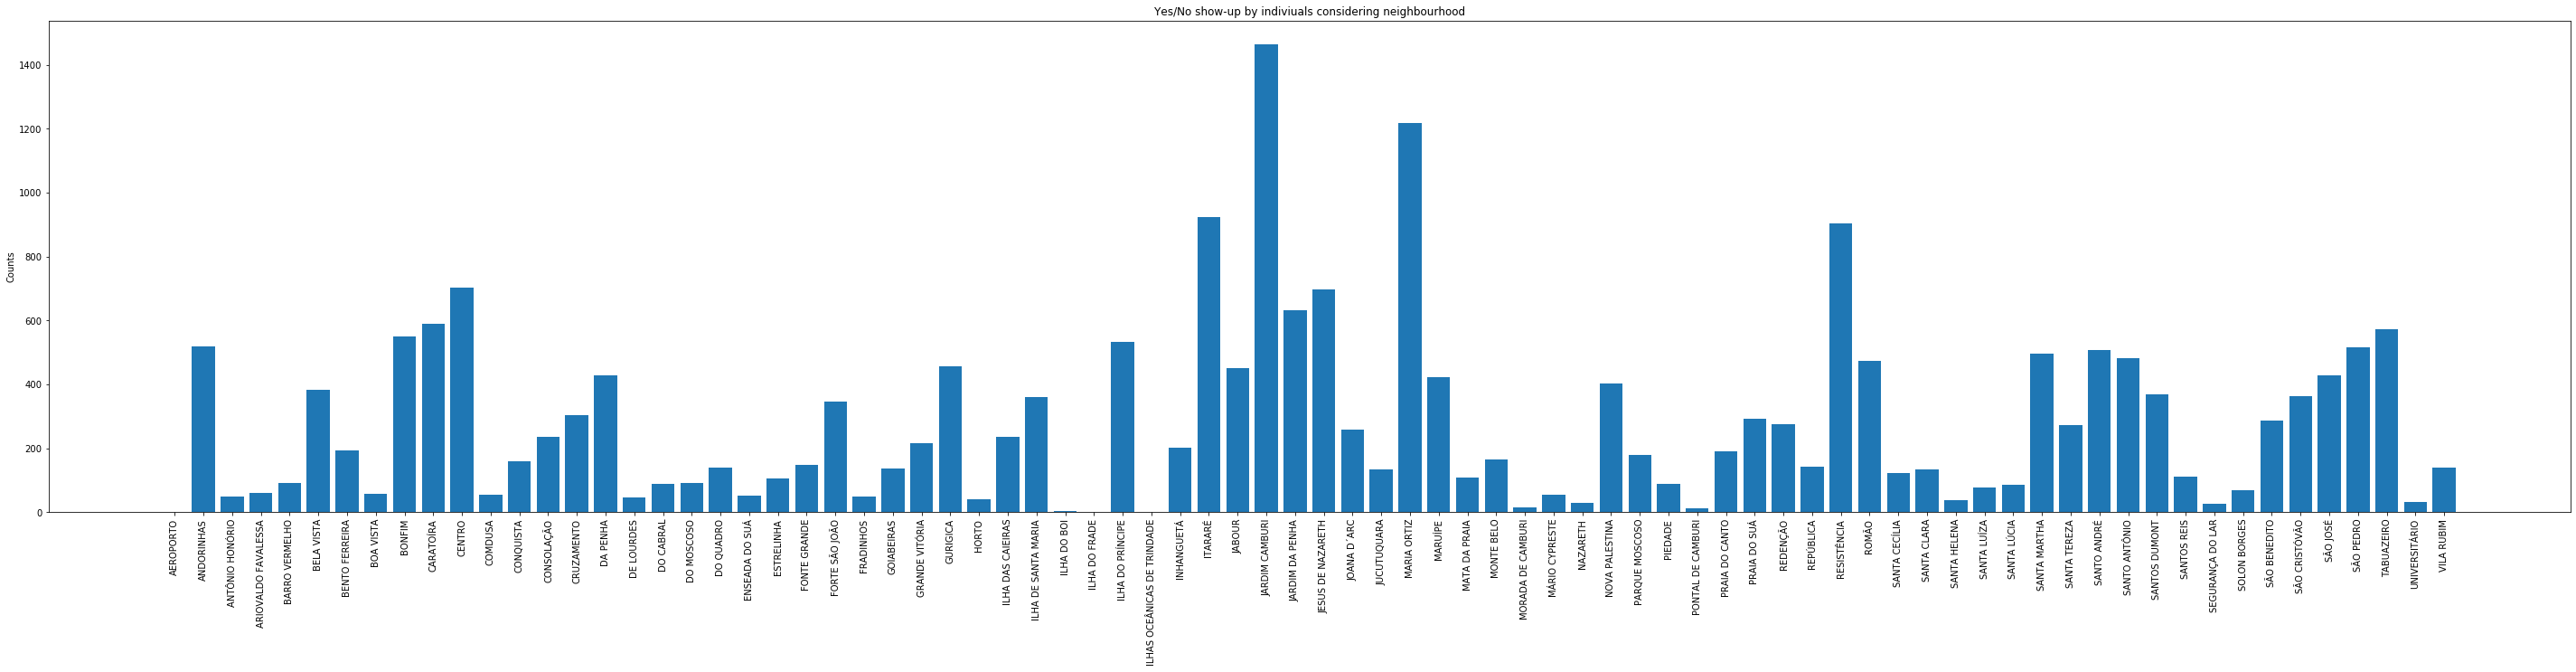

In [38]:
# Identify neighbourhood no-show counts 
neig_no_show = df.query('no_show == "Yes"').neighbourhood.value_counts().sort_index()
neig = neig_no_show.index

x = np.arange(len(neig))  
width = 0.35

fig, ax = plt.subplots(figsize=(50,10))
rect = ax.bar(x , neig_no_show,align='center')

ax.set_ylabel('Counts')
ax.set_title('Yes/No show-up by indiviuals considering neighbourhood')
ax.set_xticks(x)
ax.set_xticklabels(neig, rotation=90);

* It is possible to observe that four neighbourhoods have higher no-show.

In [39]:
print('The neighbourhoods with higher no-show rates are \n{}'.format(neig_no_show.nlargest(4)))

The neighbourhoods with higher no-show rates are 
JARDIM CAMBURI    1465
MARIA ORTIZ       1219
ITARARÉ            923
RESISTÊNCIA        905
Name: neighbourhood, dtype: int64


In [40]:
df.neighbourhood.value_counts().nlargest(4)

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4430
JARDIM DA PENHA    3877
Name: neighbourhood, dtype: int64

* It is possible to notice that the same neighbourhoods with the highest no-show rates, also have the highest appointment rates.

### Is there any relation between support of welfare program and no-show rates?

9.83% of the appointments were made from someone with scholarship
90.17% of the appointments were made from someone without scholarship


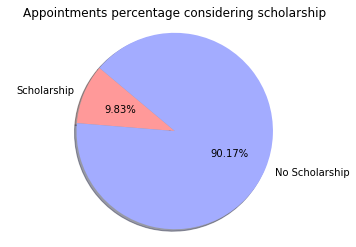

In [41]:
education = df.groupby('scholarship').no_show.value_counts()
total_ed = education.sum()
p_no_sch = round(100*education[1].sum()/total_ed,2)
p_sch = round(100*education[0].sum()/total_ed,2)
print('{}% of the appointments were made from someone with scholarship'.format(round(100*education[1].sum()/total_ed,2)))
print('{}% of the appointments were made from someone without scholarship'.format(round(100*education[0].sum()/total_ed,2)))

labels = 'Scholarship', 'No Scholarship'
sizes = [p_no_sch, p_sch]
colors = ['#ff9999', '#a3acff']
# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Appointments percentage considering scholarship')
plt.show();


* It is possible to observe that people that do not receive any scholarship are the ones that most fix appointments

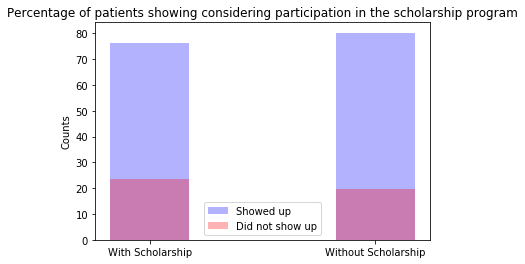

In [42]:
with_sch = round(100*(education[1]/education[1].sum()),2)
without_sch = round(100*(education[0]/education[0].sum()),2)

labels = ['With Scholarship', 'Without Scholarship']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar([x[0],x[0]], with_sch, width, alpha = 0.3, color = ['b','r'])
rects2 = ax.bar([x[1],x[1]], without_sch, width, alpha = 0.3, color = ['b','r'])
ax.set_ylabel('Counts')
ax.set_title('Percentage of patients showing considering participation in the scholarship program')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(rects1, ['Showed up','Did not show up'],loc=0);


* It is possible to notice that even though there are more appointments made by those without welfare support, the no-show rate regarding the percentage is higher among those with welfare support.

### Has receiving a sms increased influenced the no-show rate?

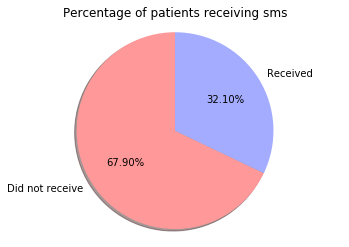

In [43]:
# Identify the percentage of patients receiving sms
sms_value = df.sms_received.value_counts()

labels = 'Did not receive', 'Received'
sizes = [p_no_sch, p_sch]
colors = ['#ff9999', '#a3acff']
# Plot
plt.pie(sms_value, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Percentage of patients receiving sms')
plt.show();

*  Most people did not receive any sms 

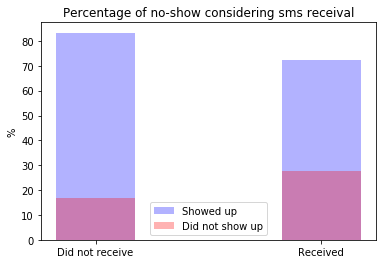

In [44]:
sms_value = df.groupby('sms_received').no_show.value_counts()
labels = ['Did not receive', 'Received']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar([0,0], round(100*(sms_value[0]/sms_value[0].sum()),2), width, alpha = 0.3, color = ['b','r'])
rects2 = ax.bar([1,1], round(100*(sms_value[1]/sms_value[1].sum()),2), width, alpha = 0.3, color = ['b','r'])
ax.set_ylabel('%')
ax.set_title('Percentage of no-show considering sms receival')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(rects1, ['Showed up', "Did not show up"]);


* Those who received a sms have a higher no-show percentage, indicating that sms might not be helping in the way is being sent.

###   Does the waiting period influence in the no-show rate?

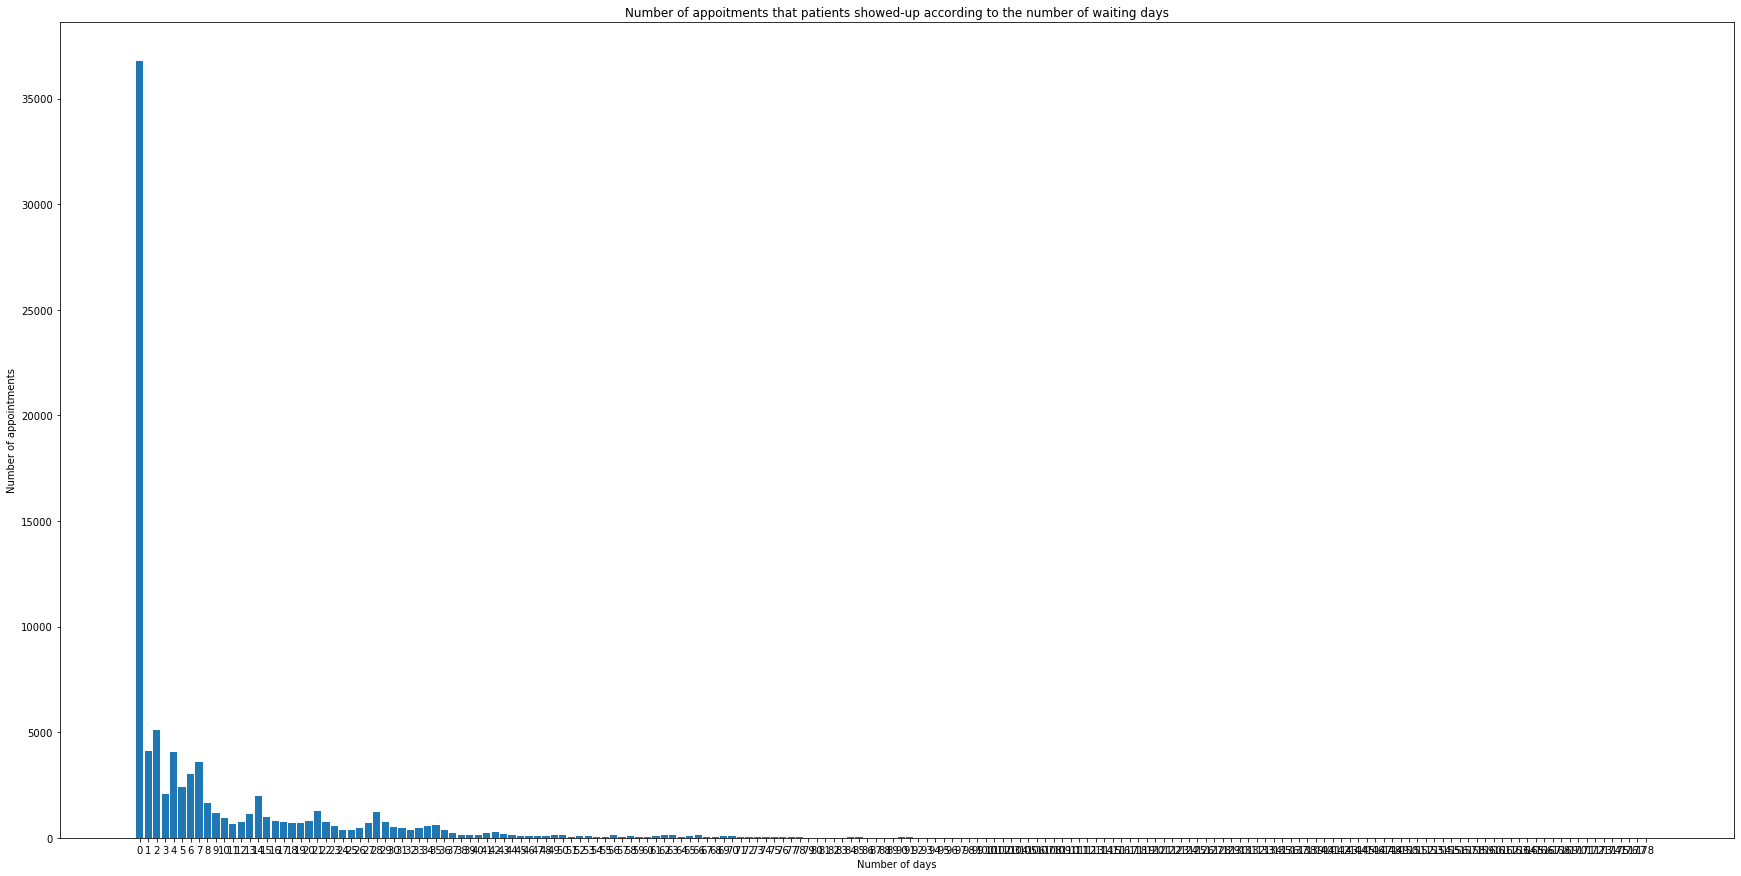

In [45]:
# Number of people not showing up to appointment according to number of waiting days
y_n_days = df[df.no_show == "Yes"].groupby('days_before_appoitment').no_show.value_counts()
# Number of people showing up to appointment according to number of waiting days
n_n_days = df[df.no_show == "No"].groupby('days_before_appoitment').no_show.value_counts()

# Visualize patient showing up according to number of waiting days
x = n_n_days.index.get_level_values(0).days
width = 0.85
labels = np.arange(0,x.max())

fig, ax = plt.subplots(figsize=(30,15))
rects1 = ax.bar(x, n_n_days.values, width)
ax.set_ylabel('Number of appointments')
ax.set_xlabel('Number of days')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.set_yscale('linear')
ax.set_title('Number of appoitments that patients showed-up according to the number of waiting days');

* It is possible to notice that most appointments are set for the same day. Also, it is possible to notice that most of the appointments are between a range of 7 waiting days.

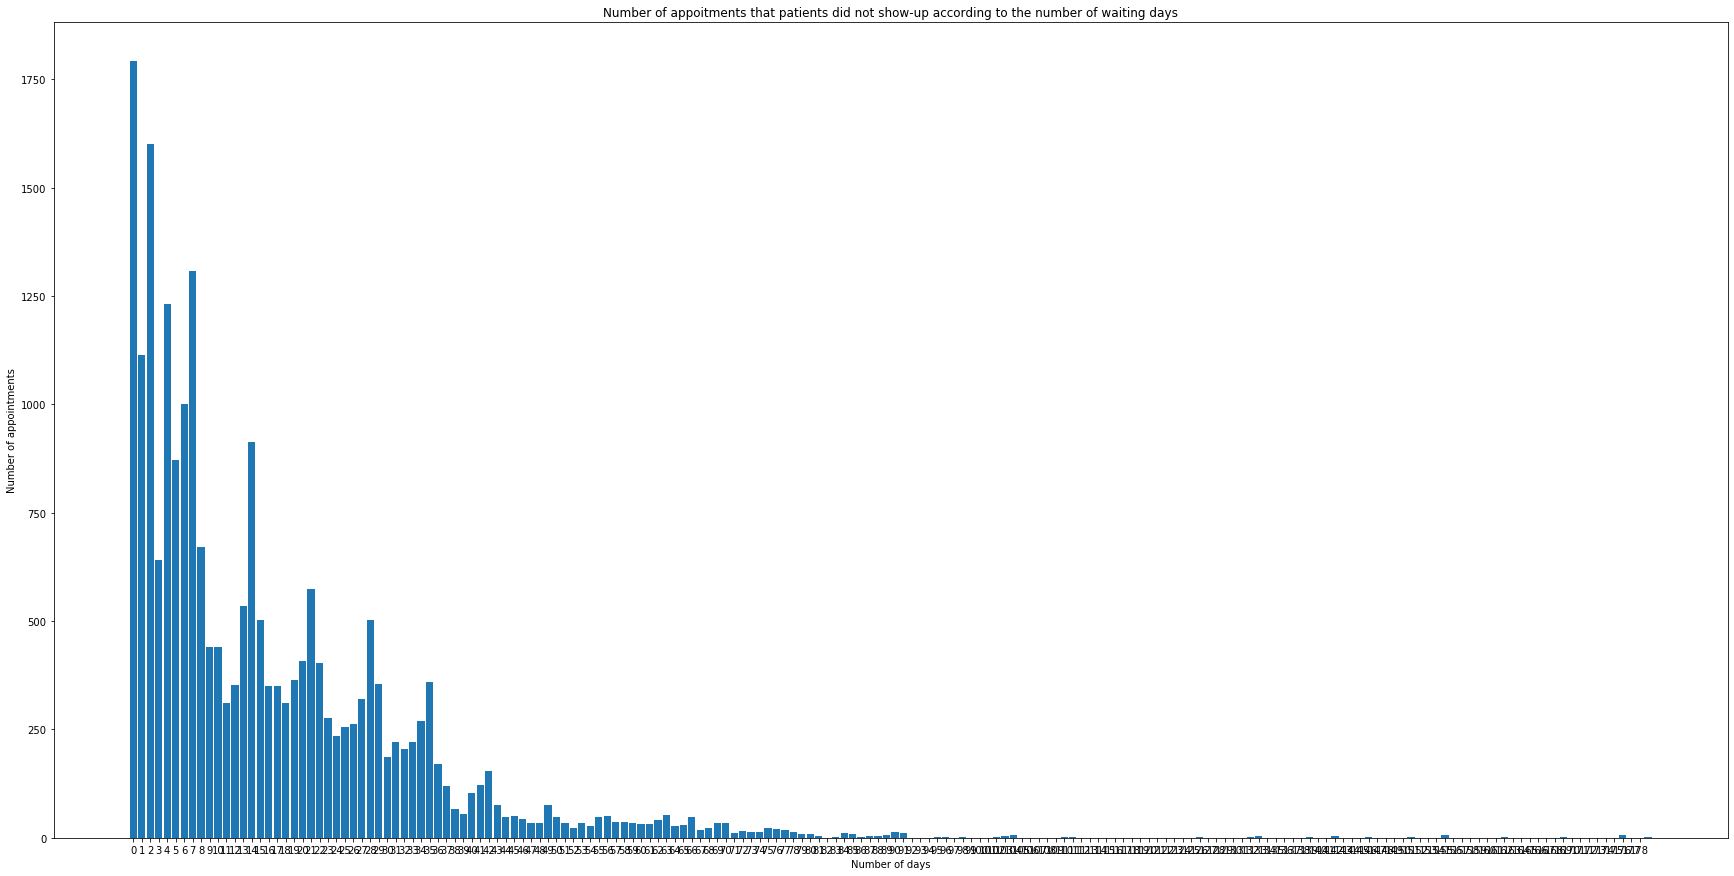

In [46]:
# Visualize patient not showing up according to number of waiting days
x = y_n_days.index.get_level_values(0).days
width = 0.85
labels = np.arange(0,x.max())

fig, ax = plt.subplots(figsize=(30,15))
rects1 = ax.bar(x, y_n_days.values, width)
ax.set_ylabel('Number of appointments')
ax.set_xlabel('Number of days')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.set_yscale('linear')
ax.set_title('Number of appoitments that patients did not show-up according to the number of waiting days');

* It is possible to notice that the higher no show rates occur for the first 7 days.

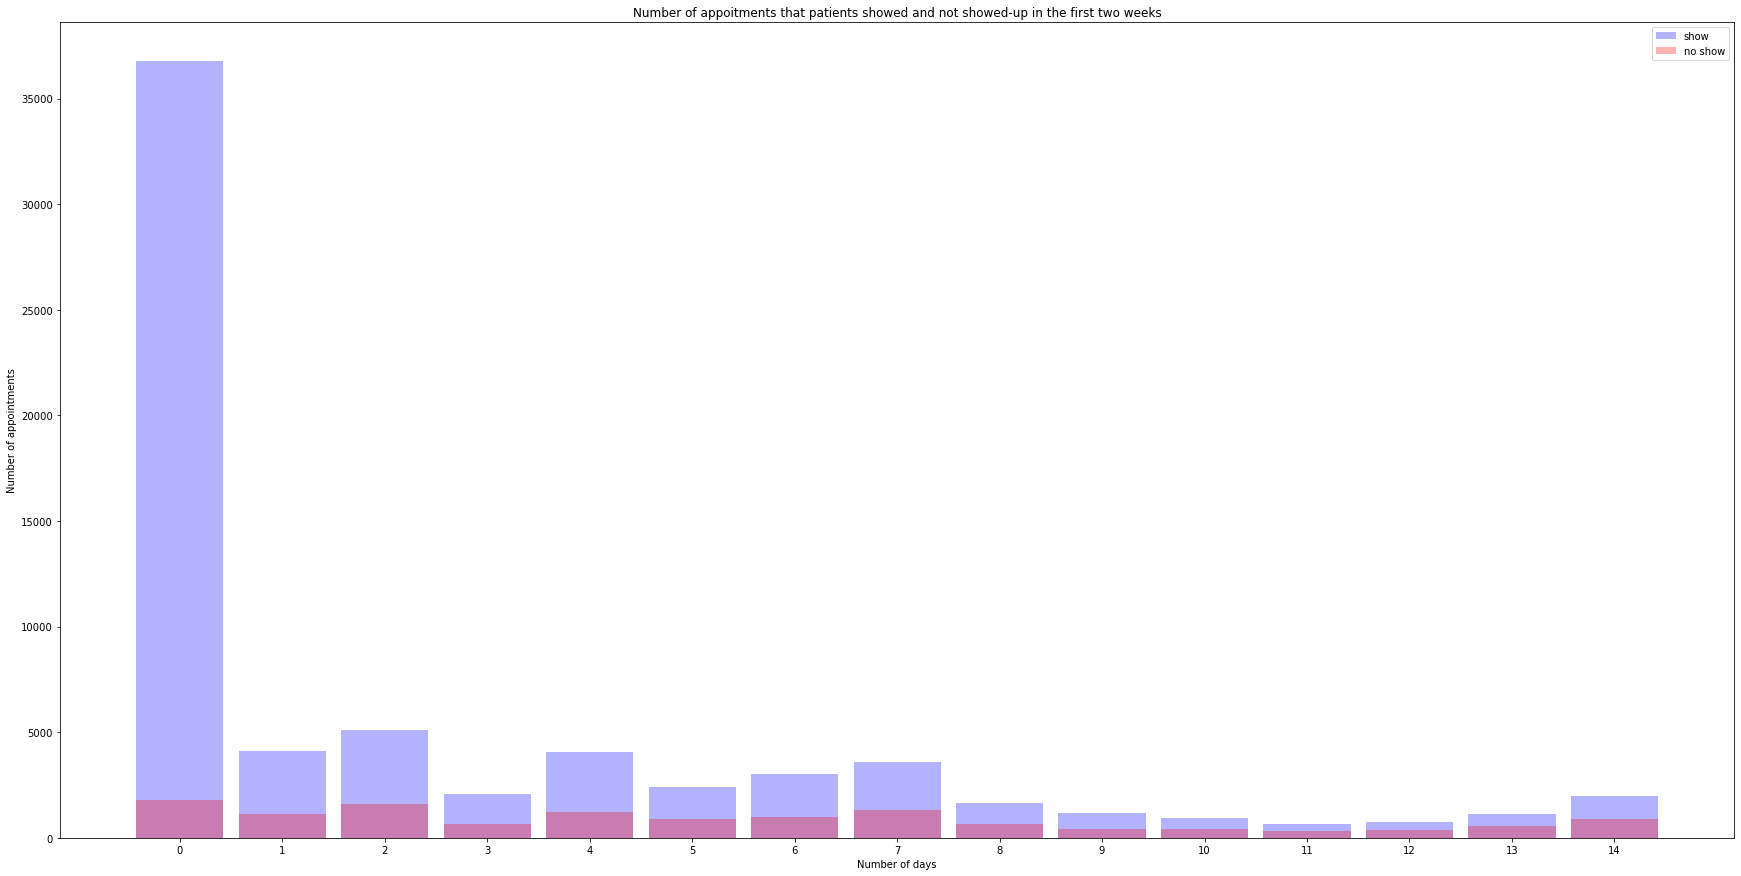

In [47]:
# Visualize patient showing up according to number of waiting days
x_n = n_n_days.index.get_level_values(0).days
x_y  = y_n_days.index.get_level_values(0).days
width = 0.85
labels = np.arange(0,x.max())[:15]

fig, ax = plt.subplots(figsize=(30,15))
rects1 = ax.bar(x_n[:15], n_n_days.values[:15], width, color = 'b', alpha=.3)
rects2 = ax.bar(x_y[:15], y_n_days.values[:15], width, color = 'r', alpha=.3)
ax.set_ylabel('Number of appointments')
ax.set_xlabel('Number of days')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.set_yscale('linear')
ax.set_title('Number of appoitments that patients showed and not showed-up in the first two weeks')
ax.legend(['show','no show']);

* There is a higher number of appointments set for the same day.
* The number of appointments set is higher for the first seven days and then decreases. The same trend is followed by the no-show rate.

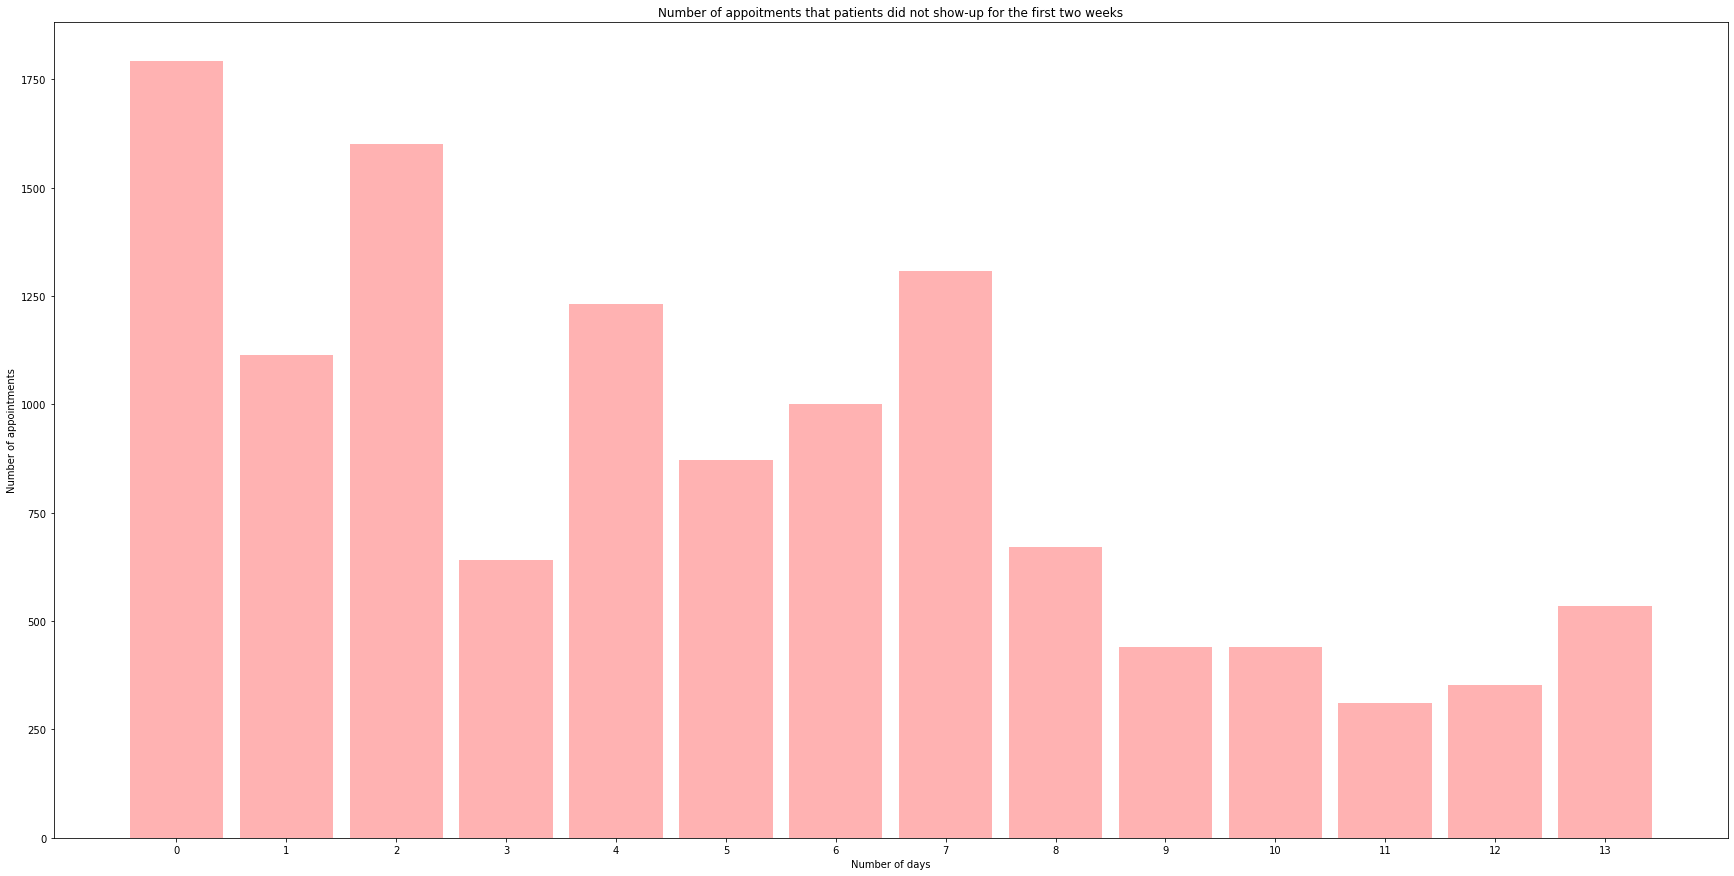

In [48]:
width = 0.85
labels = np.arange(0,x.max())[:14]

fig, ax = plt.subplots(figsize=(30,15))
rects1 = ax.bar(x_y[:14], y_n_days.values[:14], width, color = 'r', alpha=.3)
ax.set_ylabel('Number of appointments')
ax.set_xlabel('Number of days')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.set_yscale('linear')
ax.set_title('Number of appoitments that patients did not show-up for the first two weeks');

* Here it is possible to observe more closely the no-show rate decreasing after the seventh day.

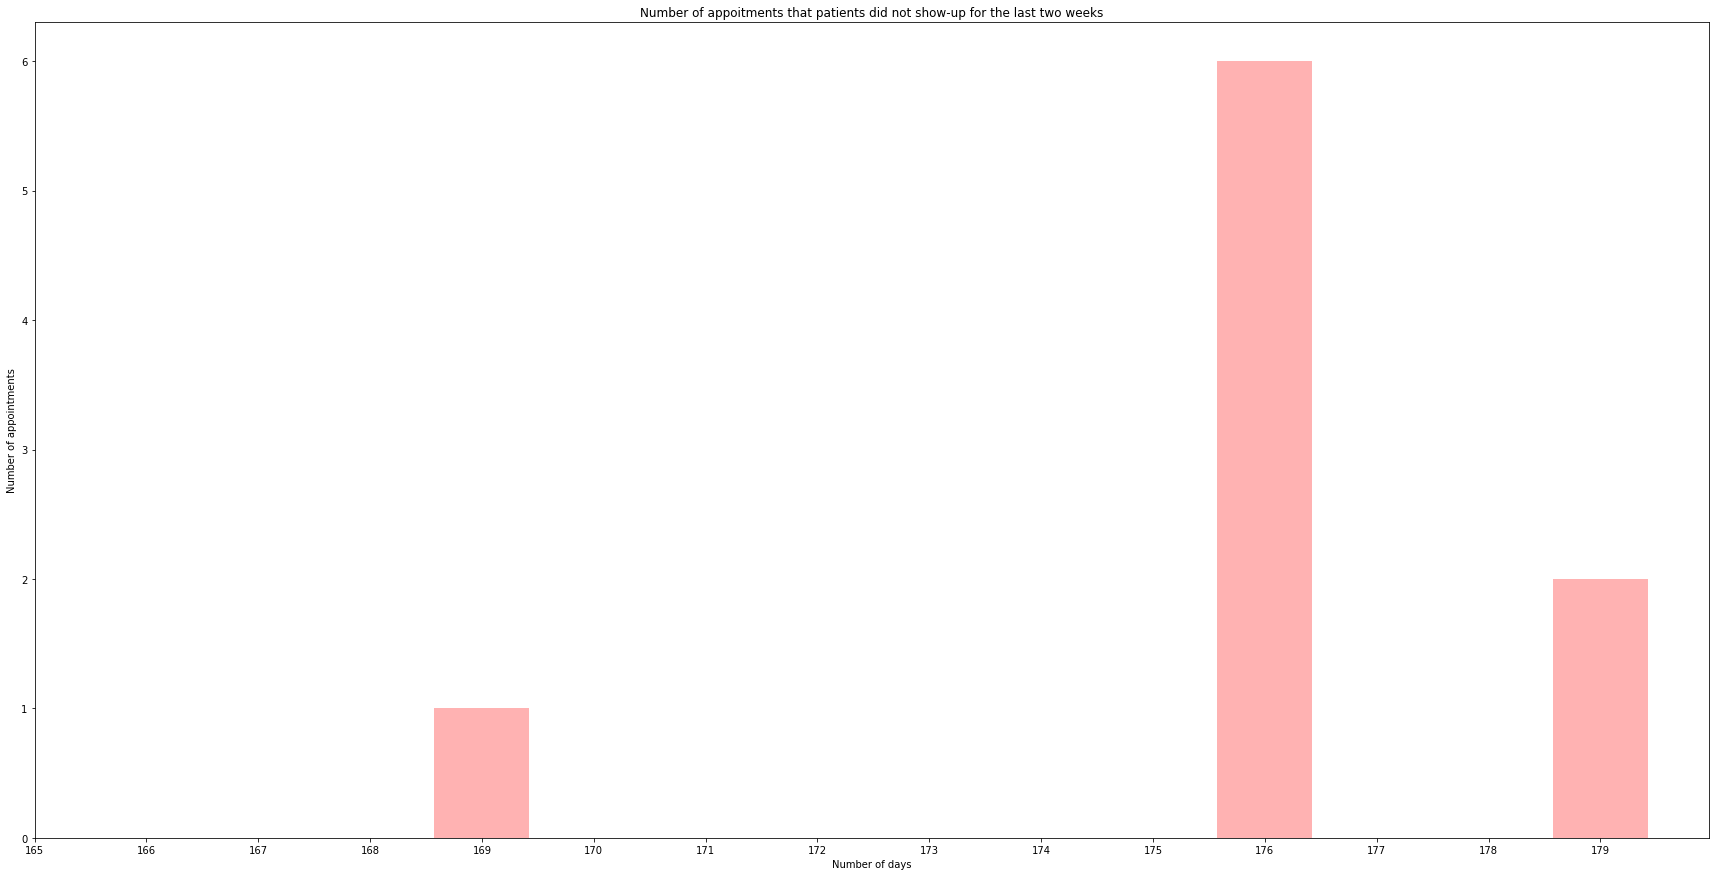

In [49]:
width = 0.85
labels = np.arange(0,x.max()+1)[-15:]

fig, ax = plt.subplots(figsize=(30,15))
rects2 = ax.bar(x_y[-3:], y_n_days.values[-3:], width, color = 'r', alpha=.3)
ax.set_ylabel('Number of appointments')
ax.set_xlabel('Number of days')
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.set_yscale('linear')
ax.set_title('Number of appoitments that patients did not show-up for the last two weeks');

* For the last two weeks of record, there are few no-shows.

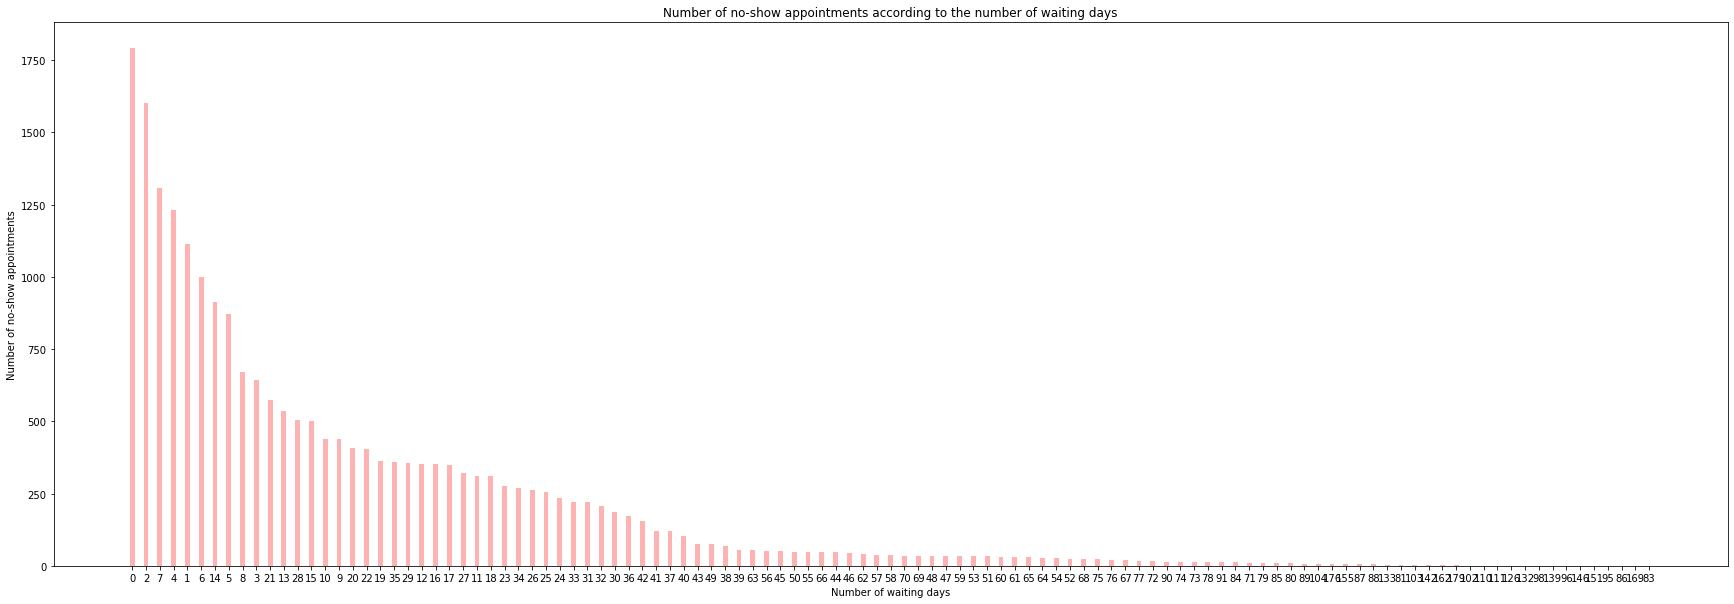

In [50]:
# y_n_days has a multiindex. I want it to have just one index in order to plot in descending order of no-shows
new_index = y_n_days.index.get_level_values(0).days # new indexes
y_n_days_new = y_n_days.values #number of appointments

y_n_days_new1 = pd.Series(y_n_days_new, name='apointments',
                          index=pd.Index(new_index, name='idx')) #setting a new series with the new index


y_n_days_new1 = y_n_days_new1.sort_values(ascending = False) # sorting the values of appointments

width = 0.35
labels = y_n_days_new1.index
x = np.arange(0,len(y_n_days_new1))

fig, ax = plt.subplots(figsize = (30,10))
rect1 = ax.bar(x,y_n_days_new1.values, width, color = 'r', alpha = 0.3)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Number of waiting days')
ax.set_ylabel('Number of no-show appointments')
ax.set_title('Number of no-show appointments according to the number of waiting days');

* The highest no-show rates are for 0, 2, 7 and 4 days of waiting.

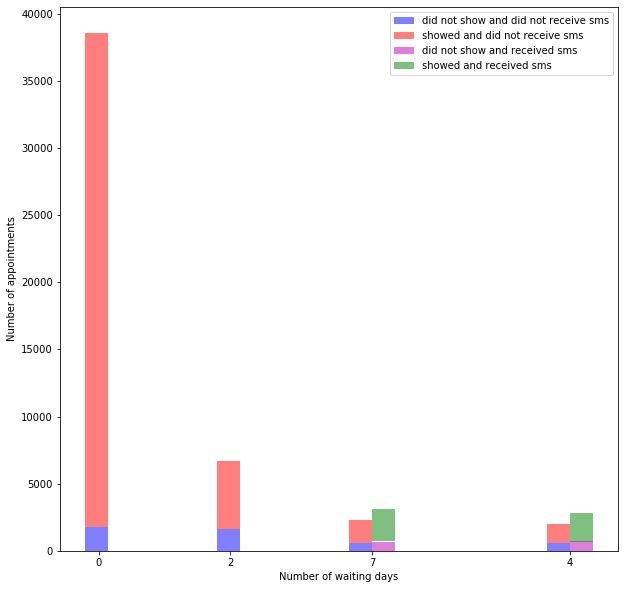

In [51]:
df.query('days_before_appoitment == ["2 days", "0 days", "7 days", "4 days"]').groupby(['sms_received', 'no_show']).days_before_appoitment.value_counts()
show_sms = df[df['no_show']=="No"].query('days_before_appoitment == ["2 days", "0 days", "7 days", "4 days"]').groupby('sms_received').days_before_appoitment.value_counts()
no_show_sms = df[df['no_show']=="Yes"].query('days_before_appoitment == ["2 days", "0 days", "7 days", "4 days"]').groupby('sms_received').days_before_appoitment.value_counts()

x = no_show_sms.index.get_level_values(1).days
x1 =show_sms.index.get_level_values(1).days 
width = 0.35

fig, ax = plt.subplots(figsize=(10,10))
rect1 = ax.bar(x[:-2] - width/2, no_show_sms.values[:-2], width, color = 'b', 
               alpha = 0.5,label = "did not show and did not receive sms")
rect3 = ax.bar(x1[:-2] - width/2, show_sms.values[:-2], width, color = 'r', 
               alpha = 0.5,label = "showed and did not receive sms", bottom = no_show_sms.values[:-2])
rect2 = ax.bar(x[-2:] + width/2, no_show_sms.values[-2:], width, color = 'm', 
               alpha = 0.5,label = "did not show and received sms")
rect4 = ax.bar(x1[-2:]+ width/2, show_sms.values[-2:], width, color = 'g', 
               alpha = 0.5, label = "showed and received sms", bottom = no_show_sms.values[-2:])
ax.set_ylabel('Number of appointments')
ax.set_xlabel('Number of waiting days')
ax.set_xticks([-.15,1.85,4,7])
ax.set_xticklabels(x)
ax.legend();

* For appointments on the same days and within two waiting days, no one received SMS.
* For the fourth and seventh days, the majority of people that showed up received SMS. However, the rate of those receiving SMS and not showing-up is higher than the ones not receiving

<a id='conclusions'></a>
## Conclusions


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After analyzing the data, it was possible to conclude that **the majority of patients show up** to their appointments. These patients are mainly **women**, however the percentage of no-show when considering the only individuals of the same gender is similar, indicating that **gender does not seem to be a cause of no-show**. When the ages of the different patients are considered, it is possible to notice **a peak of appointments set for babies** and a more or less **even distribution of the number of appointments for ages ranging between 16 and 64**. This pattern is followed by the patients that show and do not show to their appointment.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If the ages are divided into age groups, in which patients from 0 to 12 are considered children, from 13 to 20 are considered teenagers, from 21 to 35 are considered young adults, from 36 to 60 are considered adults and over 60 are considered elderly, it is possible to observe that the **majority of appointments is set for adults**. Another point that could be relevant is that young adults and elderly have a similar show-up rate to appointments, however, the no-show is higher for the young adults.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Considering patients with a medical condition, it was possible to observe that **patients with hypertension set more appointments**, and therefore have a higher no-show rate. The presence of a specific medical condition does not seem to influence the no-show, as conditions with more appointments have a higher no-show and vice-versa. This group of individuals could be considered when implementing measures to decrease no-show, as they have a high number of appointments and also have a risky medical condition.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If it is taken into consideration the neighborhood in which the hospital is located, it was noticed that **_Jardim Camburi_ and _Maria Ortiz_ have higher no-show rates**. However, those neighborhoods are also the ones with a higher number of appointments set, which could be an indication that they are too crowded and could receive an improving measure for that.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;When considering if the patient receives the support from welfare program, it was observed that **people that do not receive any scholarship are the ones that most fix appointments**. It could be reasonable to say that people with support have better conditions to maintain their health, indicating that this welfare program could be an option to decrease the number of appointments and increase overall health.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Another possible consideration is the influence of receiving an SMS. **Most patients did not receive any text message** and those who received had a higher no-show rate. Better implementation and use of the SMS service could be an option to decrease the no-show rate.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Regarding the number of waiting days between schedule an appointment, **it is possible to notice that most appointments are set for the same day**. Also, it is possible to notice that **most of the appointments are set up to 7 waiting days** and there is a higher no-show rate within the 7 first waiting days. If it is considered the number of waiting days and receiving SMS, it was noticed that for the appointments on the same day and within two days, no one received an SMS. Also, for appointments with four and seven waiting days (appointments with four and seven waiting days have a high no-show rate), **the majority of patients that showed up received an SMS**, however, the rate of those receiving SMS and not showing-up is higher than the ones not receiving. This could be another indication that the SMS service could be better implemented.

### Documentation used

https://numpy.org/doc/1.13/

https://pandas.pydata.org/docs/

https://matplotlib.org/contents.html

https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

https://www.kaggle.com/samratp/predict-show-noshow-eda-visualization-model

https://www.kaggle.com/tsilveira/applying-heatmaps-for-categorical-data-analysis
